In [ ]:
!pip install vectorbt
!pip install condacolab
import condacolab
condacolab.install()
!conda install -c conda-forge ta-lib
!pip install vectorbt

✨🍰✨ Everything looks OK!
Channels:
 - conda-forge
Platform: linux-64
Solving environment: \ | / done


==> WARNING: A newer version of conda exists. <==
    current version: 23.11.0
    latest version: 24.5.0

Please update conda by running

    $ conda update -n base -c conda-forge conda



## Package Plan ##

  environment location: /usr/local

  added / updated specs:
    - ta-lib


The following packages will be downloaded:

    package                    |            build
    ---------------------------|-----------------
    ca-certificates-2024.2.2   |       hbcca054_0         152 KB  conda-forge
    certifi-2024.2.2           |     pyhd8ed1ab_0         157 KB  conda-forge
    libblas-3.9.0              |22_linux64_openblas          14 KB  conda-forge
    libcblas-3.9.0             |22_linux64_openblas          14 KB  conda-forge
    libgfortran-ng-13.2.0      |       h69a702a_7          24 KB  conda-forge
    libgfortran5-13.2.0        |       hca663fb_7         1.4 MB  c

In [ ]:
import vectorbt as vbt
import talib
import requests
import json
import math
import pandas_datareader as web
import numpy as np
import pandas as pd
import time
import datetime
import tensorflow as tf
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense, LSTM, BatchNormalization
import matplotlib.pyplot as plt


ModuleNotFoundError: No module named 'talib'

In [ ]:
class GetBinanceData:
    @staticmethod
    def get_data(symbol, interval, startDate=datetime.datetime(2020, 1, 1), endDate=datetime.datetime.now()):
        dataList = []
        current_date = datetime.datetime.now()
        start_date = startDate

        delta_units = GetBinanceData.convert_to_minutes(interval)
        print(delta_units)
        delta = datetime.timedelta(minutes=delta_units)

        while start_date < current_date:
            end_date = start_date + delta
            if end_date > current_date:
                end_date = current_date
            # Convert datetime objects to milliseconds
            start_ms = int(start_date.timestamp() * 1000)
            end_ms = int(end_date.timestamp() * 1000)

            start_str = start_date.strftime('%Y-%m-%d %H:%M:%S')
            end_str = end_date.strftime('%Y-%m-%d %H:%M:%S')

            print(f"Fetching data from {start_str} to {end_str}")
            data = GetBinanceData.get_historical_data(symbol, interval, start_ms, end_ms)
            if data:
                dataList.extend(data)
            start_date = end_date
            time.sleep(1)

        return dataList

    @staticmethod
    def get_historical_data(symbol, interval, start_time, end_time):
        url = f"https://api.binance.us/api/v3/klines"
        params = {
            'symbol': symbol.upper(),
            'interval': interval,
            'startTime': start_time,
            'endTime': end_time,
            'limit': 1000
        }

        response = requests.get(url, params=params)
        if response.status_code == 200:
            data = response.json()
            return data
        else:
            print(f"Failed to fetch data. Status code: {response.status_code}")
            return None

    @staticmethod
    def convert_to_minutes(time_str):
        time_mapping = {
            'm': 1,
            'h': 60,
            'd': 1440,
            'w': 10080,
            'M': 43200
        }

        num = int(time_str[:-1])
        unit = time_str[-1]

        return (num * time_mapping[unit])*1000

    def data_to_dataframe(data):
      # Define the column names based on Binance API response
      columns = [
          "Open Time", "Open", "High", "Low", "Close", "Volume",
          "Close Time", "Quote Asset Volume", "Number of Trades",
          "Taker Buy Base Asset Volume", "Taker Buy Quote Asset Volume", "Ignore"
      ]
      # Convert the data to a pandas DataFrame
      df = pd.DataFrame(data, columns=columns)
      # Convert timestamp columns to datetime
      df["Open Time"] = pd.to_datetime(df["Open Time"], unit='ms')
      df["Close Time"] = pd.to_datetime(df["Close Time"], unit='ms')
      # Convert numeric columns to float
      numeric_columns = ["Open", "High", "Low", "Close", "Volume", "Quote Asset Volume",
                        "Taker Buy Base Asset Volume", "Taker Buy Quote Asset Volume"]
      df[numeric_columns] = df[numeric_columns].astype(float)
      return df

    @staticmethod
    def get_data_dataFrame(symbol, interval, startDate=datetime.datetime(2020, 1, 1), endDate=datetime.datetime.now()):
        data = GetBinanceData.get_data(symbol, interval, startDate, endDate)
        return GetBinanceData.data_to_dataframe(data)

In [ ]:
#

In [ ]:
class IndicatorFactory:
    @staticmethod
    def calculate_sma(df, period , smakey=''):

        df['SMA'+smakey] = talib.SMA(df['Close'], timeperiod=period)
        return df

    @staticmethod
    def calculate_rsi(df, period):

        df['RSI'] = talib.RSI(df['Close'], timeperiod=period)
        return df
    @staticmethod
    def calculate_hma(df, period):

        df['WMA_half'] = talib.WMA(df['Close'], timeperiod=int(period/2))
        df['WMA_full'] = talib.WMA(df['Close'], timeperiod=period)
        df['HMA'] = talib.WMA(2 * df['WMA_half'] - df['WMA_full'], timeperiod=int(np.sqrt(period)))
        return df

    @staticmethod
    def calculate_sar(df, acceleration=0.02, maximum=0.2):

        df['SAR'] = talib.SAR(df['High'], df['Low'], acceleration=acceleration, maximum=maximum)
        return df

In [ ]:
!pip install Historic-Crypto

In [ ]:
data = GetBinanceData.get_data('btcusdt', '30m', startDate=datetime.datetime(2020, 1, 20), endDate=datetime.datetime.now())

30000
Fetching data from 2020-01-20 00:00:00 to 2020-02-09 20:00:00
Fetching data from 2020-02-09 20:00:00 to 2020-03-01 16:00:00
Fetching data from 2020-03-01 16:00:00 to 2020-03-22 12:00:00
Fetching data from 2020-03-22 12:00:00 to 2020-04-12 08:00:00
Fetching data from 2020-04-12 08:00:00 to 2020-05-03 04:00:00
Fetching data from 2020-05-03 04:00:00 to 2020-05-24 00:00:00
Fetching data from 2020-05-24 00:00:00 to 2020-06-13 20:00:00
Fetching data from 2020-06-13 20:00:00 to 2020-07-04 16:00:00
Fetching data from 2020-07-04 16:00:00 to 2020-07-25 12:00:00
Fetching data from 2020-07-25 12:00:00 to 2020-08-15 08:00:00
Fetching data from 2020-08-15 08:00:00 to 2020-09-05 04:00:00
Fetching data from 2020-09-05 04:00:00 to 2020-09-26 00:00:00
Fetching data from 2020-09-26 00:00:00 to 2020-10-16 20:00:00
Fetching data from 2020-10-16 20:00:00 to 2020-11-06 16:00:00
Fetching data from 2020-11-06 16:00:00 to 2020-11-27 12:00:00
Fetching data from 2020-11-27 12:00:00 to 2020-12-18 08:00:00
Fe

In [ ]:
df = GetBinanceData.data_to_dataframe(data)
df.head()
len(df)

76178

In [ ]:
sma20 = IndicatorFactory.calculate_sma(df , 20 , "_20")
sma50 = IndicatorFactory.calculate_sma(df , 50 ,"_50")
sma200 = IndicatorFactory.calculate_sma(df , 200 ,"_200")
SAR = IndicatorFactory.calculate_sar(df , 0.2 , 0.2 )
HMA = IndicatorFactory.calculate_hma(df , 55)


In [ ]:
# df["sma20"] = sma20
# df["sma50"] = sma50
# df["sma200"] = sma200
# df["sar"] = SAR
# df["hma"] = HMA


                Open Time      Open      High       Low     Close    Volume  \
199   2020-01-24 03:30:00   8326.50   8351.40   8321.43   8324.52  1.222179   
200   2020-01-24 04:00:00   8328.21   8344.57   8306.33   8308.84  0.681632   
201   2020-01-24 04:30:00   8308.84   8318.37   8300.02   8310.53  0.952148   
202   2020-01-24 05:00:00   8307.44   8339.72   8307.44   8324.90  0.882999   
203   2020-01-24 05:30:00   8330.95   8333.53   8312.79   8323.81  0.695115   
...                   ...       ...       ...       ...       ...       ...   
76173 2024-05-26 14:30:00  69114.18  69287.89  69045.80  69213.42  0.286770   
76174 2024-05-26 15:00:00  69219.60  69353.24  69156.18  69261.77  0.538210   
76175 2024-05-26 15:30:00  69261.77  69261.77  68707.07  68799.98  0.840000   
76176 2024-05-26 16:00:00  68751.18  68926.38  68663.90  68737.08  0.705910   
76177 2024-05-26 16:30:00  68737.04  68887.50  68672.46  68866.00  0.218130   

                   Close Time  Quote Asset Volume  

KeyError: 'SMA'

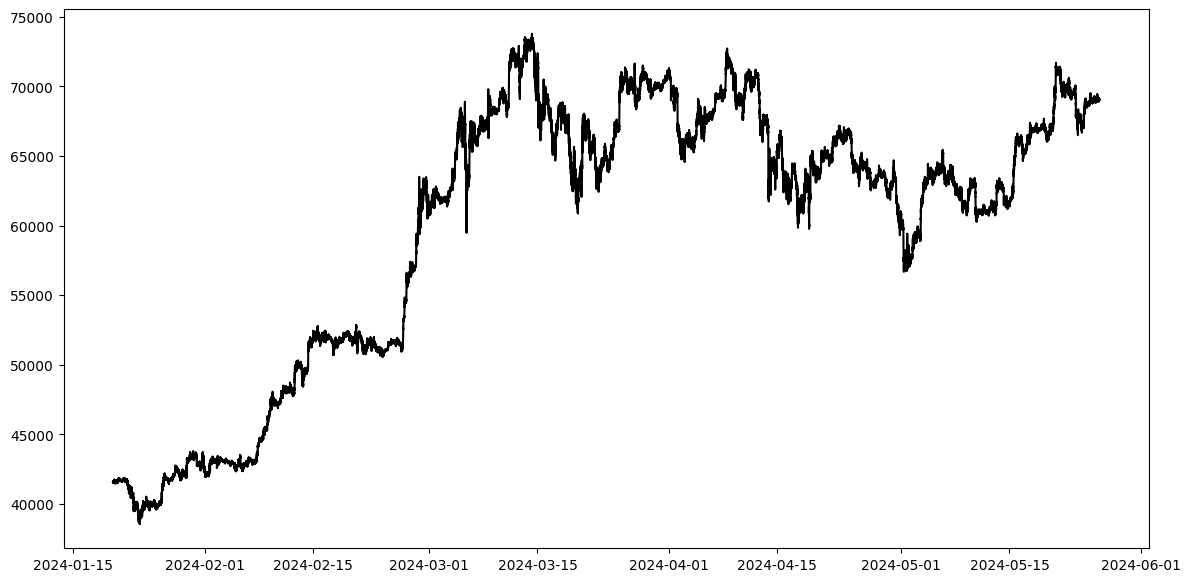

In [ ]:


# # Plotting
# plt.figure(figsize=(14, 7))

# # Plotting the Close price
# plt.plot(df['Open Time'], df['Close'], label='Close', color='black')

# # Plotting the SMA
# plt.plot(df['Open Time'], df['SMA'], label='SMA', color='blue')

# # Plotting the SAR
# plt.plot(df['Open Time'], df['SAR'], label='SAR', color='green')

# # Plotting the HMA
# plt.plot(df['Open Time'], df['HMA'], label='HMA', color='red')

# # Adding title and legend
# plt.title('Price and Indicators')
# plt.legend()

# # Rotating x-axis labels for better readability
# plt.xticks(rotation=45)

# # Adding grid
# plt.grid(True)

# # Displaying the plot
# plt.show()


In [ ]:

df.head()
long_signal = (df['SMA_20'] > df['SMA_50']) & (df['SMA_50'] > df['SMA_200']) & (df['SAR'] < df['Close']) & (df['HMA'].shift(1) < df['HMA'])
close_signal = (df['SMA_20'] < df['SMA_50']) & (df['SMA_50'] < df['SMA_200']) & (df['SAR'] > df['Close']) & (df['HMA'].shift(1) > df['HMA'])


portfolio = vbt.Portfolio.from_signals(df['Close'], entries=long_signal, exits=close_signal )


print(portfolio.stats())
print(portfolio.total_return())
portfolio.plot().show()

Output hidden; open in https://colab.research.google.com to view.

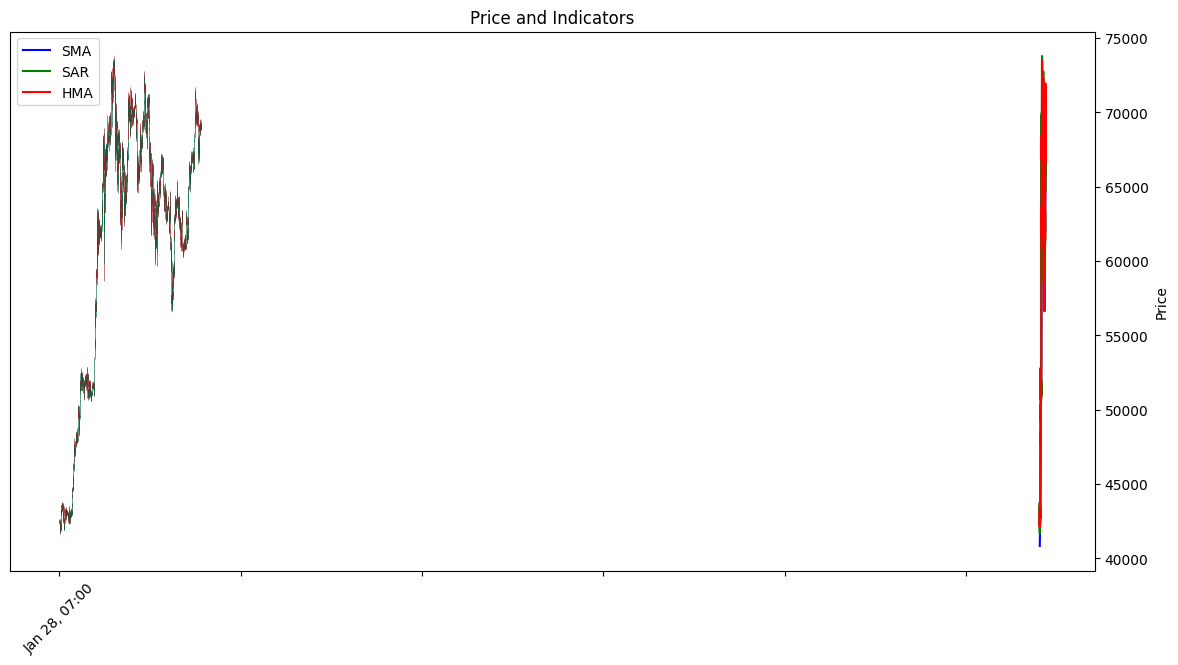

In [ ]:

import matplotlib.pyplot as plt
import mplfinance as mpf

# Plotting
fig, ax = plt.subplots(figsize=(14, 7))

# Plotting the candlestick chart
mpf.plot(df.set_index('Open Time'), type='candle', style='charles', volume=False, ax=ax)

# Plotting the SMA
plt.plot(df['Open Time'], df['SMA'], label='SMA', color='blue')

# Plotting the SAR
plt.plot(df['Open Time'], df['SAR'], label='SAR', color='green')

# Plotting the HMA
plt.plot(df['Open Time'], df['HMA'], label='HMA', color='red')

# Adding title and legend
plt.title('Price and Indicators')
plt.legend()

# Rotating x-axis labels for better readability
plt.xticks(rotation=45)

# Adding zoom functionality
mpf.show()

# Displaying the plot
plt.show()


In [ ]:
print(data)
len(data)

[[1705708800000, '41694.70000000', '41700.52000000', '41502.32000000', '41502.32000000', '11.60354000', 1705712399999, '482740.88491190', 993, '1.95077000', '81197.33272840', '0'], [1705712400000, '41551.68000000', '41700.52000000', '41508.30000000', '41661.23000000', '4.15045000', 1705715999999, '172823.11465070', 491, '2.77382000', '115531.78680520', '0'], [1705716000000, '41661.23000000', '41661.23000000', '41542.74000000', '41598.19000000', '1.84650000', 1705719599999, '76792.79055590', 251, '0.70001000', '29127.93088970', '0'], [1705719600000, '41629.56000000', '41647.17000000', '41521.02000000', '41626.07000000', '1.94341000', 1705723199999, '80777.33930180', 201, '1.26938000', '52785.65591600', '0'], [1705723200000, '41618.80000000', '41653.29000000', '41581.06000000', '41601.81000000', '1.63414000', 1705726799999, '68026.16758790', 216, '0.64040000', '26667.46354980', '0'], [1705726800000, '41649.05000000', '41652.31000000', '41561.14000000', '41637.07000000', '2.09742000', 170

3063

In [ ]:
class BinanceData:
    @staticmethod
    def get_klines(symbol, interval, limit):
        base_url = 'https://api.binance.us/api/v3'
        url = f'{base_url}/klines'
        params = {
            'symbol': symbol,
            'interval': interval,
            'limit': limit
        }
        response = requests.get(url, params=params)
        if response.status_code == 200:
            klines = json.loads(response.text)
            json =
            return klines
        else:
            print(f"Failed to fetch data. Status code: {response.status_code}")
            return None

In [ ]:
data = BinanceData.get_klines('BTCUSDT', '1h', 1000)
print(data )


[[1713070800000, '63997.53000000', '64451.62000000', '63895.81000000', '64403.72000000', '1.09404000', 1713074399999, '70329.57423210', 481, '0.74342000', '47792.85767580', '0'], [1713074400000, '64403.49000000', '64876.33000000', '64141.53000000', '64620.13000000', '2.33169000', 1713077999999, '150458.55845790', 464, '2.08986000', '134855.59706450', '0'], [1713078000000, '64625.09000000', '64780.02000000', '64294.99000000', '64488.33000000', '0.46986000', 1713081599999, '30348.43099080', 340, '0.12379000', '8001.77386590', '0'], [1713081600000, '64477.93000000', '64840.00000000', '64368.72000000', '64482.60000000', '0.14653000', 1713085199999, '9474.32987950', 237, '0.09541000', '6174.75221880', '0'], [1713085200000, '64527.07000000', '64715.67000000', '63953.17000000', '64062.83000000', '0.32857000', 1713088799999, '21111.75808290', 275, '0.13188000', '8497.72506620', '0'], [1713088800000, '64094.14000000', '64632.80000000', '64094.14000000', '64463.36000000', '5.32402000', 171309239

In [ ]:
def custom_indicator(close, rsi_window = 14, ma_window = 50, entry = 30, exit = 70):
  rsi = vbt.RSI.run(close, window=rsi_window).rsi.to_numpy()
  ma = vbt.MA.run(close, ma_window).ma.to_numpy()
  trend = np.where(rsi >exit, -1, 0)
  trend = np.where((rsi <entry) & (close < ma), 1, trend)
  return trend
#create indicator factory
ind = vbt.IndicatorFactory(
    class_name = "Combination",
    short_name = "comb",
    input_names = ["close"],
    param_names = ["rsi_window", "ma_window", "entry", "exit"],
    output_names = ["value"]
).from_apply_func(
    custom_indicator,
    rsi_window = 14,
    ma_window = 50,
    entry = 30,
    exit = 70,
    keep_pd = True
)


res = ind.run(btc_price,
              rsi_window = [11,35,21],
              ma_window = [21,50,70],
              entry = [30, 40],
              exit = [60, 70],
              param_product = True)
entries = res.value == 1.0
exits = res.value == -1.0

pf = vbt.Portfolio.from_signals(btc_price, entries, exits, freq = '1h',
    sl_stop=0.025,
    tp_stop=0.5,
    sl_trail = True,
   upon_stop_exit = vbt.portfolio.enums.StopExitMode.Reverse,

    # upon_opposite_entry='reverse'
                                )
pf.total_return()